In [1]:
import pandas as pd

In [2]:
def fix_data(df, default_buffer_size, flag=True):
    if flag:
        columns = ['size', 'numberQueries', 'keyDistribution', 'valueDistribution',
           'snappy_read_times', 'simd_read_times', 'rle_read_times',
           'zlib_read_times', 'zstandard_read_times', 'uncompressed_read_times',
           'snappy_load_times', 'simd_load_times', 'rle_load_times',
           'zlib_load_times', 'zstandard_load_times', 'uncompressed_load_times',
           'snappy_sizes', 'simd_sizes', 'rle_sizes', 'zlib_sizes',
           'zstandard_sizes', 'uncompressed_sizes', 'readPercentage']
        readPercentage = []
        snappy_ratio = []
        simd_ratio = []
        rle_ratio = []
        zlib_ratio = []
        zstandard_ratio = []
        default_buffer_sizes = []

        for row in range(len(df)):
            if row % 2 == 0:
                readPercentage.append(100)
            else:
                readPercentage.append(50)

            default_buffer_sizes.append(default_buffer_size)

        size = df['size']
        numberQueries = df['numberQueries']
        keyDistribution = df['keyDistribution']
        valueDistribution = df['valueDistribution']
        snappy_read_times = df['snappy_read_times']
        simd_read_times = df['simd_read_times']
        rle_read_times = df['rle_read_times']
        zlib_read_times = df['zlib_read_times']
        zstandard_read_times = df['zstandard_read_timesuncompressed_read_times']
        uncompressed_read_times = df['snappy_load_times']
        snappy_load_times = df['simd_load_times']
        simd_load_times = df['rle_load_times']
        rle_load_times = df['zlib_load_times']
        zlib_load_times = df['zstandard_load_times']
        zstandard_load_times = df['uncompressed_load_times']
        uncompressed_load_times = df['snappy_sizes']
        snappy_sizes = df['simd_sizes']
        simd_sizes = df['rle_sizes']
        rle_sizes = df['zlib_sizes']
        zlib_sizes = df['zstandard_sizes']
        zstandard_sizes = df['uncompressed_sizes']
        uncompressed_sizes = df['readPercentage']

        data = zip(size, numberQueries, keyDistribution, valueDistribution, 
                  snappy_read_times, simd_read_times, rle_read_times, zlib_read_times, zstandard_read_times, uncompressed_read_times,
                  snappy_load_times, simd_load_times, rle_load_times, zlib_load_times, zstandard_load_times, uncompressed_load_times,
                  snappy_sizes, simd_sizes, rle_sizes, zlib_sizes, zstandard_sizes, uncompressed_sizes, readPercentage)


        new_df = pd.DataFrame(data, columns = columns)
    else:
        new_df = df
    
    snappy_ratio = []
    simd_ratio = []
    rle_ratio = []
    zlib_ratio = []
    zstandard_ratio = []
    default_buffer_sizes = []
    
    for row in range(len(new_df)):
        default_buffer_sizes.append(default_buffer_size)
        # Compute the ratios
        uncompressed_size = new_df.iloc[row].uncompressed_sizes
        
        if uncompressed_size != 0:
            sizes = new_df.iloc[row]
            snappy_ratio.append(sizes['snappy_sizes'] / uncompressed_size)
            simd_ratio.append(sizes['simd_sizes'] / uncompressed_size)
            rle_ratio.append(sizes['rle_sizes'] / uncompressed_size)
            zlib_ratio.append(sizes['zlib_sizes'] / uncompressed_size)
            zstandard_ratio.append(sizes['zstandard_sizes'] / uncompressed_size)
        else:
            snappy_ratio.append(1)
            simd_ratio.append(1)
            rle_ratio.append(1)
            zlib_ratio.append(1)
            zstandard_ratio.append(1)
    
    columns = ['size', 'numberQueries', 'keyDistribution', 'valueDistribution',
       'snappy_read_times', 'simd_read_times', 'rle_read_times',
       'zlib_read_times', 'zstandard_read_times', 'uncompressed_read_times',
       'snappy_load_times', 'simd_load_times', 'rle_load_times',
       'zlib_load_times', 'zstandard_load_times', 'uncompressed_load_times',
       'snappy_sizes', 'simd_sizes', 'rle_sizes', 'zlib_sizes',
       'zstandard_sizes', 'uncompressed_sizes', 'readPercentage', 
        'snappy_ratios', 'simd_ratios', 'rle_ratios', 'zlib_ratios', 'zstandard_ratios', 'default_buffer_sizes']
    data = zip(size, numberQueries, keyDistribution, valueDistribution, 
          snappy_read_times, simd_read_times, rle_read_times, zlib_read_times, zstandard_read_times, uncompressed_read_times,
          snappy_load_times, simd_load_times, rle_load_times, zlib_load_times, zstandard_load_times, uncompressed_load_times,
          snappy_sizes, simd_sizes, rle_sizes, zlib_sizes, zstandard_sizes, uncompressed_sizes, readPercentage, 
            snappy_ratio, simd_ratio, rle_ratio, zlib_ratio, zstandard_ratio, default_buffer_sizes)
    
    new_df = pd.DataFrame(data, columns = columns)
    
    return new_df

In [3]:
from collections import defaultdict 

def plot(df, keyDistribution, valueDistribution, readPercentage, mode):
    keyDistributionDic = {0: "Uniform", 1: "Sequential", 2: "Normal"}
    valueDistributionDic = {0: "Uniform", 1: "Sequential"}
    columns = None
    y_val = None
    x_val = "Number of KV Pairs"
    title = mode + ' Key Distribution: ' + str(keyDistribution) + ' Value Distribution: ' + str(valueDistribution) + ' Read Percentage: ' + str(readPercentage)
    
    if mode == 'read':
        columns = ['snappy_read_times', 'simd_read_times', 'rle_read_times', 'zlib_read_times', 
                   'zstandard_read_times', 'uncompressed_read_times']
        title = "Key Distribution: " + keyDistributionDic[keyDistribution] + " Value Distribution: " + valueDistributionDic[valueDistribution]
        y_val = 'Latency (Seconds)'
    elif mode == 'load':
        columns = ['snappy_load_times', 'simd_load_times', 'rle_load_times', 'zlib_load_times', 
                   'zstandard_load_times', 'uncompressed_load_times']
        title = "Key Distribution: " + keyDistributionDic[keyDistribution] + " Value Distribution: " + valueDistributionDic[valueDistribution]
        y_val = 'Latency (Seconds)'
    elif mode == 'ratio':
        columns = ['snappy_ratios', 'simd_ratios', 'rle_ratios', 'zlib_ratios', 
                   'zstandard_ratios']
        title = "Key Distribution: " + keyDistributionDic[keyDistribution] + " Value Distribution: " + valueDistributionDic[valueDistribution]
        y_val = 'Ratio'
    elif mode == 'sizes':
        columns = ['snappy_sizes', 'simd_sizes', 'rle_sizes', 'zlib_sizes',
                  'zstandard_sizes', 'uncompressed_sizes']
        title = "Key Distribution: " + keyDistributionDic[keyDistribution] + " Value Distribution: " + valueDistributionDic[valueDistribution]
        y_val = 'Size (Bytes 10e7)'
    
    
    filtered_df = df[(df['keyDistribution'] == keyDistribution) & (df['valueDistribution'] == valueDistribution) & 
                     (df['readPercentage'] == readPercentage)]
    
    plot_data = defaultdict(None)
    for col in columns:
        plot_data[col] = list(filtered_df[col])
    
    plot_df = pd.DataFrame(plot_data, index=list(filtered_df['size']))
    lines = plot_df.plot.line(title=title)
    lines.set_xlabel(x_val)
    lines.set_ylabel(y_val)
    
    return None

In [4]:
### Machine Learning --> can we predict compression ratio R based on the keyDistribution, valueDistribution, size
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import BayesianRidge

def create_ml_data(df, compression_type):
    columns = ['keyDistribution', 'valueDistribution', 'size', 'numberQueries']
    X = df[columns].to_numpy()
    y = df[[compression_type]].to_numpy()
    
    return X,y

def crossFoldValidation(X, y, model):
    cv_results = cross_validate(model, X, y, cv=5)

    return cv_results

def linear_regression(X, y):
    return LinearRegression().fit(X, y)

def random_forest(X, y):
    return RandomForestRegressor(max_depth=10, random_state=0).fit(X, y)

def mlp_regressor(X, y):
    return MLPRegressor(random_state=1, max_iter=500).fit(X, y)

def bayesian_regression(X,y):
    return BayesianRidge(compute_score=True).fit(X,y)

def run_ml(df, compression_scheme):
    X, y = create_ml_data(df, compression_scheme)
    linreg = linear_regression(X, y)
    rf = random_forest(X, y)
    mlp = mlp_regressor(X, y)
    
    print("Linear Regression CV Scores: ", crossFoldValidation(X, y, linreg)['test_score'])
    print("Random Forest CV Scores: ", crossFoldValidation(X, y, rf))
    print("MLP Regressor CV Scores: ", crossFoldValidation(X, y, mlp))

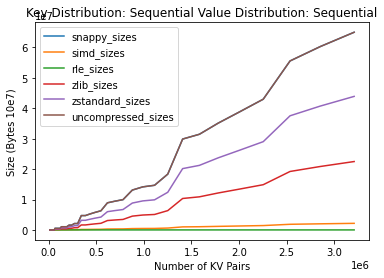

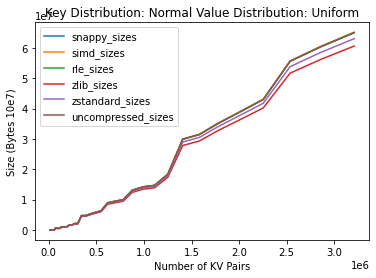

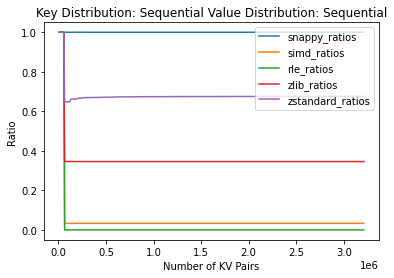

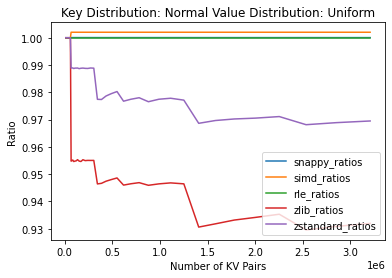

In [5]:
def main():
    nuc71 = pd.read_csv('data/03032021003151.csv', index_col=False)
    nuc72 = pd.read_csv('data/04032021041613.csv', index_col=False)
    nuc73 = pd.read_csv('data/05032021201038.csv', index_col=False)
    
    nuc71 = fix_data(nuc71, 16384)
    nuc72 = fix_data(nuc72, 32768*2)
    nuc73 = fix_data(nuc73, 32768*4)
    
    # Plots Go Here
#     plot(nuc71, 0, 0, 100, 'sizes')
#     plot(nuc71, 0,1, 100, 'sizes')
#     plot(nuc71, 1,0, 100, 'sizes')
#     plot(nuc71, 1, 1, 100, 'sizes')
#     plot(nuc71, 2, 0, 10, 'sizes')
#     plot(nuc71, 2, 1, 100, 'sizes')
    
#     plot(nuc72, 0, 0, 100, 'sizes')
#     plot(nuc72, 0,1, 100, 'sizes')
#     plot(nuc72, 1,0, 100, 'sizes')
    plot(nuc72, 1, 1, 100, 'sizes')
    plot(nuc72, 2, 0, 100, 'sizes')
#     plot(nuc72, 2, 1, 100, 'sizes')

    plot(nuc72, 1, 1, 100, 'ratio')
    plot(nuc72, 2, 0, 100, 'ratio')
    
#     plot(nuc73, 0, 0, 100, 'sizes')
#     plot(nuc73, 0,1, 100, 'sizes')
#     plot(nuc73, 1,0, 100, 'sizes')
#     plot(nuc73, 1, 1, 100, 'sizes')
#     plot(nuc73, 2, 0, 10, 'sizes')
#     plot(nuc73, 2, 1, 100, 'sizes')
    
#     plot(nuc72, 0, 0, 100, 'read')
#     plot(nuc72, 0,1, 100, 'read')
#     plot(nuc72, 1,0, 100, 'read')
#     plot(nuc72, 1, 1, 100, 'read')
#     plot(nuc72, 2, 0, 100, 'read')
#     plot(nuc72, 2, 1, 100, 'read')
    
#     plot(nuc73, 0, 0, 100, 'read')
#     plot(nuc73, 0,1, 100, 'read')
#     plot(nuc73, 1,0, 100, 'read')
#     plot(nuc73, 1, 1, 100, 'read')
#     plot(nuc73, 2, 0, 100, 'read')
#     plot(nuc73, 2, 1, 100, 'read')
    
    
    #ML Go Here
    #run_ml(nuc72, 'snappy_ratios')

main()

In [3]:
import pandas as pd

In [4]:
snappy_data = pd.read_csv('data_sketching/clean_data/snappy.csv', header=None).drop_duplicates()
num_cols = 51
n_bins = 20
print(snappy_data)
snappy_data = snappy_data.drop(snappy_data[snappy_data[num_cols - 1] > 2.0].index)
print(len(snappy_data))

               0         1             2         3         4         5   \
0   -4.567210e-01  0.019897  1.963040e-02  0.020302  0.020256  0.020309   
1    1.980590e-02  0.020264  2.050780e-02  0.019791  0.019470  0.019974   
2    1.998900e-02  0.019989  1.998900e-02  0.019989  0.019989  0.019989   
3   -6.119350e-02  0.020935 -6.235320e-02  0.019226  0.019348  0.019592   
4   -3.977740e+14  0.020264 -3.977740e+14  0.019959  0.020019  0.020752   
..            ...       ...           ...       ...       ...       ...   
893  1.619080e+19  0.000015  1.619080e+19  0.000046  0.000076  0.000183   
894  1.525880e-05  0.000000  7.629390e-05  0.000046  0.000122  0.000290   
897  8.117740e+16  0.020218  8.117740e+16  0.019974  0.019775  0.019028   
898  2.018740e-02  0.019684  1.986690e-02  0.020111  0.020294  0.019791   
899  1.988980e-02  0.020584  1.982120e-02  0.020111  0.020325  0.020454   

           6         7         8         9   ...        41        42  \
0    0.019806  0.020767  0.

In [5]:
import numpy as np
def dataExtraction(path):
    df = pd.read_csv(path, header=None).drop_duplicates()
    num_cols = len(df.columns)
    n_bins = 20

    print(len(df))
    df = df.drop(df[df[num_cols - 1] > 2.0].index)
    print(len(df))
    df.replace([np.inf, -np.inf], np.nan)
    df.dropna(axis=0)
    print(len(df))
    
    # Figure out this binning stuff later --> see if you get any useful predictions
    #y = pd.cut(df[num_cols - 1], n_bins, retbins=True)[0]

    mask = np.any(np.isnan(df) | np.equal(df, np.inf) | np.equal(df, -np.inf), axis=1)
    new_data = df[~mask]
    X, y = np.hsplit(new_data, [num_cols - 1])
    
    return X,y

In [7]:
def run_ml_new(path):
    X,y = dataExtraction(path)
    
    linreg = linear_regression(X, y)
    rf = random_forest(X, y)
    mlp = mlp_regressor(X, y)
    bayesian = bayesian_regression(X,y)
    
    #print("Linear Regression CV Scores: ", crossFoldValidation(X, y, linreg))
    print("Random Forest CV Scores: ", crossFoldValidation(X, y, rf))
    print("Bayesian Regression CV Scores: ", crossFoldValidation(X, y, bayesian))
    #print("MLP Regressor CV Scores: ", crossFoldValidation(X, y, mlp))

In [8]:
print("Snappy Results: ")
run_ml_new('data_sketching/clean_data/snappy.csv')
print("###############################")
print("Simd Results: ")
run_ml_new('data_sketching/clean_data/simd.csv')
print("###############################")
print("RLE Results: ")
run_ml_new('data_sketching/clean_data/rle.csv')
print("###############################")
print("Zlib Results: ")
run_ml_new('data_sketching/clean_data/zlib.csv')
print("###############################")
print("Zstandard Results: ")
run_ml_new('data_sketching/clean_data/zstandard.csv')


Snappy Results: 
773
773
773


<ipython-input-6-5e5432244a7d>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return RandomForestRegressor(max_depth=10, random_state=0).fit(X, y)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

Random Forest CV Scores:  {'fit_time': array([0.650388  , 0.7740891 , 0.74804616, 0.67858672, 0.77890015]), 'score_time': array([0.01200986, 0.03616095, 0.01087284, 0.00975823, 0.01074481]), 'test_score': array([0.79071027, 0.64970879, 0.73873684, 0.7352792 , 0.76318507])}
Bayesian Regression CV Scores:  {'fit_time': array([0.00595093, 0.00417614, 0.00407577, 0.00536394, 0.00499296]), 'score_time': array([0.00382209, 0.00360513, 0.00576997, 0.00610781, 0.00347018]), 'test_score': array([-8.71562857e-03, -6.50410141e+22, -2.82730534e+23, -1.83968139e+22,
       -4.45422880e+19])}
###############################
Simd Results: 
773
773
773


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Random Forest CV Scores:  {'fit_time': array([0.8824861 , 0.82988524, 0.81693387, 0.81444669, 0.82929087]), 'score_time': array([0.01004791, 0.01001191, 0.010221  , 0.00993013, 0.00982094]), 'test_score': array([0.99420682, 0.99438713, 0.9943506 , 0.99568946, 0.99646104])}
Bayesian Regression CV Scores:  {'fit_time': array([0.00581193, 0.00430393, 0.00401115, 0.00399899, 0.00396419]), 'score_time': array([0.00314903, 0.003016  , 0.00324106, 0.00300598, 0.00299883]), 'test_score': array([-1.75890025e+22, -4.29905700e+21, -6.84107424e+22, -1.06138435e-02,
       -2.23073742e+18])}
###############################
RLE Results: 
773
773
773


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Random Forest CV Scores:  {'fit_time': array([0.30447316, 0.25107026, 0.2604208 , 0.25668716, 0.26603174]), 'score_time': array([0.01031995, 0.00927067, 0.01023626, 0.00959206, 0.00888228]), 'test_score': array([0.99658289, 0.99912835, 0.99926723, 0.99903199, 0.99967093])}
Bayesian Regression CV Scores:  {'fit_time': array([0.00550604, 0.00502586, 0.0039022 , 0.00449729, 0.00429702]), 'score_time': array([0.00398397, 0.00311804, 0.00294471, 0.00297976, 0.00497603]), 'test_score': array([ 6.68641029e-04, -4.11109921e+22, -1.23027192e-02, -1.02468627e+22,
       -5.20026043e+18])}
###############################
Zlib Results: 
772
772
772


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Random Forest CV Scores:  {'fit_time': array([0.84466314, 0.82904482, 0.84001017, 0.82421374, 0.8567729 ]), 'score_time': array([0.01115584, 0.00964904, 0.01057792, 0.01049924, 0.01023412]), 'test_score': array([0.99543149, 0.99482001, 0.9965687 , 0.997129  , 0.99715696])}
Bayesian Regression CV Scores:  {'fit_time': array([0.00553417, 0.0041492 , 0.00402403, 0.00402594, 0.00409293]), 'score_time': array([0.00358582, 0.00313592, 0.00323987, 0.00295019, 0.00296307]), 'test_score': array([-6.51316419e+01, -3.53160456e-02, -5.55706653e-01, -2.51447352e-03,
       -3.17910719e+18])}
###############################
Zstandard Results: 
773
773
773


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Random Forest CV Scores:  {'fit_time': array([0.85487103, 0.82933903, 0.83270288, 0.82666802, 0.87079287]), 'score_time': array([0.01006389, 0.01022387, 0.01138043, 0.00996876, 0.01057601]), 'test_score': array([0.99238723, 0.99206174, 0.9934508 , 0.99364648, 0.99456444])}
Bayesian Regression CV Scores:  {'fit_time': array([0.0059793 , 0.00401092, 0.00433993, 0.00400829, 0.00400519]), 'score_time': array([0.00318789, 0.00317907, 0.00371504, 0.00316501, 0.00354791]), 'test_score': array([-2.45251293e+22, -5.86374532e+21, -9.21776976e+22, -1.13162269e-02,
       -1.26827798e+19])}


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [7]:
df = pd.read_csv("data/results_50.csv")
df.head()

,keyDistribution,valueDistribution,load_times,query_times,sizes,leniency
0,0,0,29.8583,11.1094,22544384,1.0
1,0,0,29.7320,10.8880,22544384,1.3
2,0,0,29.9335,11.0854,22544384,1.6
3,0,0,29.9085,10.8560,22544384,1.9
4,0,0,29.9051,10.9260,22544384,2.2


In [9]:
df_new = df[(df['keyDistribution'] == 0) & (df['valueDistribution'] == 1)]
df_new.head()

,keyDistribution,valueDistribution,load_times,query_times,sizes,leniency
11,0,1,29.9789,11.4510,20711796,1.0
12,0,1,29.8007,10.9846,21084552,1.3
13,0,1,29.8614,12.7613,19511412,1.6
14,0,1,29.9665,11.3609,20711796,1.9
15,0,1,29.7020,10.6665,21227312,2.2


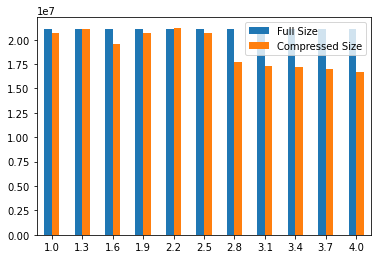

In [11]:
index = [1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4.0]
full_size = [21084552] * 11
new_size = list(df_new['sizes'])

bar_chart_df = pd.DataFrame({'Full Size': full_size,
                   'Compressed Size': new_size}, index=index)

ax = bar_chart_df.plot.bar(rot=0)

In [12]:
this_df = df.groupby(['leniency']).agg(lambda x: x.unique().mean())
this_df.head()

,keyDistribution,valueDistribution,load_times,query_times,sizes
leniency,,,,,
1.0,1,0.5,29.075450,11.519450,17291771.8
1.3,1,0.5,28.990667,11.434983,17340110.2
1.6,1,0.5,29.061233,12.333800,16586345.4
1.9,1,0.5,29.098900,11.517317,17265559.0
2.2,1,0.5,28.968767,11.429117,17394875.0


In [10]:
def bar_chart(df, title, max_val):
    this_df = df.groupby(['leniency']).agg(lambda x: x.unique().mean())
    max_size = [max_val] * 11
    compressed_sizes = list(this_df['sizes'])
    index = [1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4.0]
    new_df = pd.DataFrame({'Full Size': max_size,
                   'Compressed Size': compressed_sizes}, index=index)
    
    ax = new_df.plot.bar(rot=0, title=title)
    ax.set_xlabel("Leniency")
    ax.set_ylabel("Sizes (Bytes)")
    
    return None

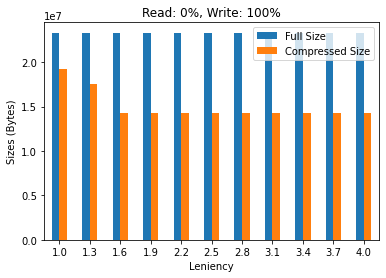

In [13]:
df_50 = pd.read_csv("data/results_50.csv")
df_0 = pd.read_csv("data/results_0.csv")

bar_chart(df_0, "Read: 0%, Write: 100%", 23325160)
